In [ ]:
%load_ext autoreload
%autoreload 2

https://medium.com/auquan/time-series-analysis-for-financial-data-part-1-stationarity-autocorrelation-and-white-noise-1a1cc2fb23f2

https://medium.com/auquan/time-series-analysis-ii-auto-regressive-models-d0cb1a8a7c43

https://medium.com/auquan/time-series-analysis-for-financial-data-iii-moving-average-models-cccf027f264e


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

In [3]:
# ms = pd.read_csv('data/psfa_microsoft.csv')
ms = pd.read_csv('data/psfa_facebook.csv')
# ms = pd.read_csv('data/psfa_apple.csv')
# ms = pd.read_csv('data/psfa_ind_Nikkei225.csv')
# ms = pd.read_csv('data/psfa_tsla.csv')
# ms = pd.read_csv('apple.csv')
# ms = pd.read_csv('amazon.csv')
# ms = pd.read_csv('data/psfa_ind_nasdaq_composite.csv')

In [4]:
# ms['Close'] = ms[' Close/Last'].apply(lambda x: float(x.replace('$', '')))

In [5]:
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])

In [6]:
ms.shape

(780, 8)

In [7]:
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)
mu, sigma

(0.0030376688631700453, 0.025061818594986074)

# Probabilidad de que el retorno caiga más de un 1%

In [8]:
days = range(1, 300)
loss = 0.01
umbral = np.log(1-loss)
rango = np.linspace(-0.2, 0.2, 100)
probs = []
pdfs = []
for i in days:
    mu_n = i*mu
    sigma_n = (i**0.5)*sigma
    probs.append(norm.cdf(umbral, mu_n, sigma_n))
    pdfs.append(norm.pdf(rango, mu_n, sigma_n))

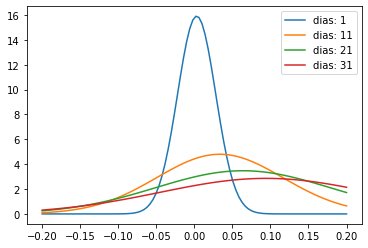

In [9]:
idx = range(0, 40, 10)
for i in idx:
    plt.plot(rango, pdfs[i], label=f'dias: {i+1}')
plt.legend()

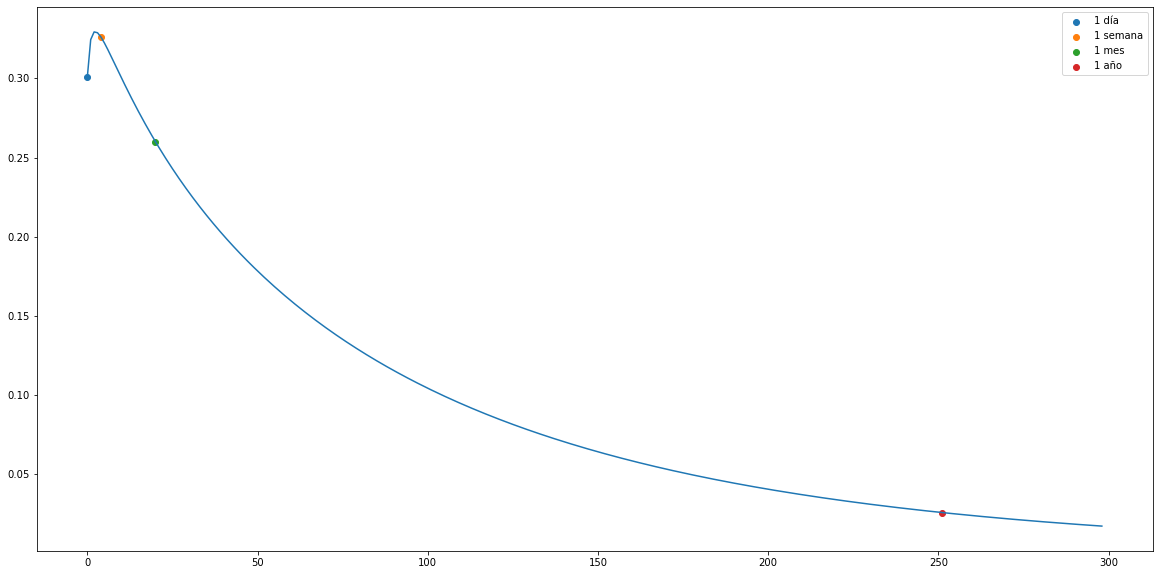

In [10]:
plt.figure(figsize=(20,10))
plt.plot(probs)
plt.scatter(0, probs[0], label='1 día')
plt.scatter(4, probs[4], label='1 semana')
plt.scatter(20, probs[20], label='1 mes')
plt.scatter(251, probs[251], label='1 año')
plt.legend()

# Independencia

In [296]:
correlations = []
for i in range(300):
    ms[f'LogReturn_{i+1}'] = ms['LogReturn'].shift(-(i+1))
    correlations.append(ms['LogReturn'].corr(ms[f'LogReturn_{i+1}']))
# ms['LogReturn'].corr(ms['LogReturn_1'])
# np.corrcoef(ms['LogReturn'][:-2], ms['LogReturn_1'][:-2])

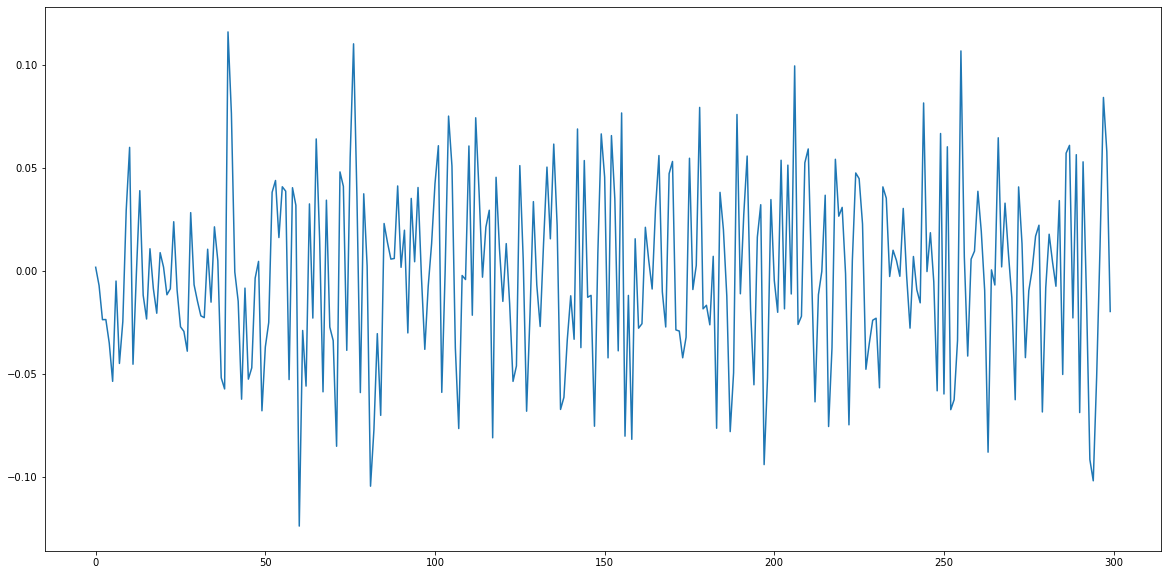

In [298]:
plt.figure(figsize=(20,10))
plt.plot(correlations)

In [286]:
ms['LogReturn'].autocorr(lag=40)

0.1160669207939074

In [291]:
# ms['LogReturn'].autocorrelation_plot()

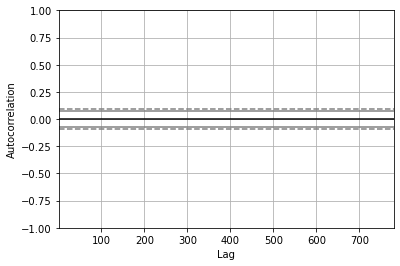

In [290]:
pd.plotting.autocorrelation_plot(ms['LogReturn'], )